## Automated Canny Edge Detection

In [294]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

In [295]:
"""Helper function to display images"""
def dispim(img, cmap='gray'):
    if cmap == 'gray':
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.axis('off')
    plt.show()

In [296]:
"""Function mapping image size to kernel size, mapping found emperically."""
def get_ksize(size):
    if size < 540:
        ksize = 5
    elif size < 720:
        ksize = 7
    elif size < 1080:
        ksize = 9
    else:
        ksize = 11
    return ksize

In [297]:
"""Automated Canny Detection"""
def detect(src, sigma=0.33):
    
    # 'src' is a single channel image
    m = np.median(src)
    
    # Getting the integer bounds automatically for double thresholding
    l = int(max(0  , (1.0-sigma)*m))
    u = int(min(255, (1.0+sigma)*m))
    
    noisy_dst = cv2.Canny(src, l, u)
    
    # 'Smoothening' the noisy image with gaussian blurring
    size = min(src.shape)
    k = get_ksize(size)
    dst = cv2.GaussianBlur(noisy_dst, (k, k), 0)
    return dst

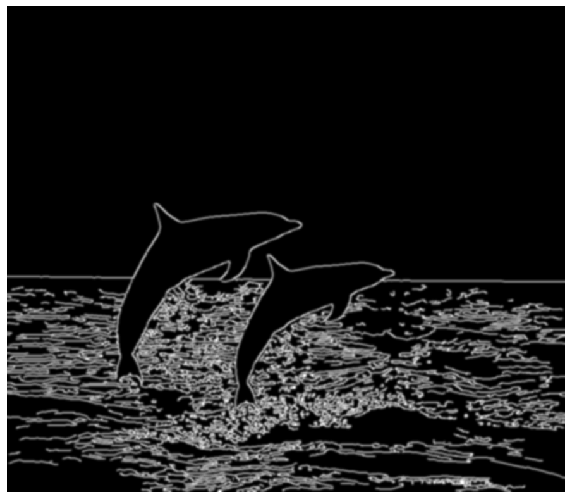

In [298]:
src = cv2.imread('dolphins.jpg', 0)
src = cv2.GaussianBlur(src, (5, 5), 0)

dst = detect(src)
dispim(dst)
# plt.imshow(dst, cmap='gray')
# plt.axis('off')
# plt.savefig('haha.jpg', dpi=300, bbox_inches='tight')
# plt.show()

#### References:
  
- [PyImageSearch](https://www.pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/)